In [1]:
"""
完成describe和info使用，练习上课的电影案例（操作与上课一致）
"""
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

# 设置全局字体
font_path = fm.findfont(fm.FontProperties(family='SimHei'))
plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.size'] = 26  # 设置全局字号

In [2]:
df_obj = pd.DataFrame(np.random.randn(5,4), columns = ['a', 'b', 'c', 'd'])

df_obj.describe()
# describe会跳过缺失值
# 可以设置 include='all' 以统计非数值列

,a,b,c,d
count,5.000000,5.000000,5.000000,5.000000
mean,0.461178,-0.240572,0.335653,-0.249862
std,1.093045,1.179239,1.367999,1.104779
min,-0.799579,-1.690611,-1.412170,-1.953548
25%,-0.086201,-0.974752,-0.444083,-0.525396
50%,0.247499,-0.152588,0.126732,0.028897
75%,0.839499,0.209244,1.571616,0.164370
max,2.104671,1.405850,1.836171,1.036368


In [3]:
print(df_obj.info())

# 打印：
# 行数 行下标
# 列数 
# 行，列标签 ， 非空数值数 ， 数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       5 non-null      float64
 1   b       5 non-null      float64
 2   c       5 non-null      float64
 3   d       5 non-null      float64
dtypes: float64(4)
memory usage: 292.0 bytes
None


# 用pandas 绘图

In [4]:
df_movies = pd.read_csv('../IMDB-Movie-Data.csv')

# 查看导入的 df 
print(df_movies.info())
df_movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


(array([ 1.,  0.,  0.,  2.,  0.,  0.,  7.,  7., 12., 17., 26., 22., 33.,
        61., 44., 44., 47., 37., 43., 70., 48., 46., 38., 44., 43., 26.,
        50., 24., 21., 24., 22., 19., 14., 13., 11.,  9.,  9.,  8.,  7.,
        10.,  6.,  2.,  7.,  2.,  6.,  7.]),
 array([ 66.        ,  68.15217391,  70.30434783,  72.45652174,
         74.60869565,  76.76086957,  78.91304348,  81.06521739,
         83.2173913 ,  85.36956522,  87.52173913,  89.67391304,
         91.82608696,  93.97826087,  96.13043478,  98.2826087 ,
        100.43478261, 102.58695652, 104.73913043, 106.89130435,
        109.04347826, 111.19565217, 113.34782609, 115.5       ,
        117.65217391, 119.80434783, 121.95652174, 124.10869565,
        126.26086957, 128.41304348, 130.56521739, 132.7173913 ,
        134.86956522, 137.02173913, 139.17391304, 141.32608696,
        143.47826087, 145.63043478, 147.7826087 , 149.93478261,
        152.08695652, 154.23913043, 156.39130435, 158.54347826,
        160.69565217, 162.847826

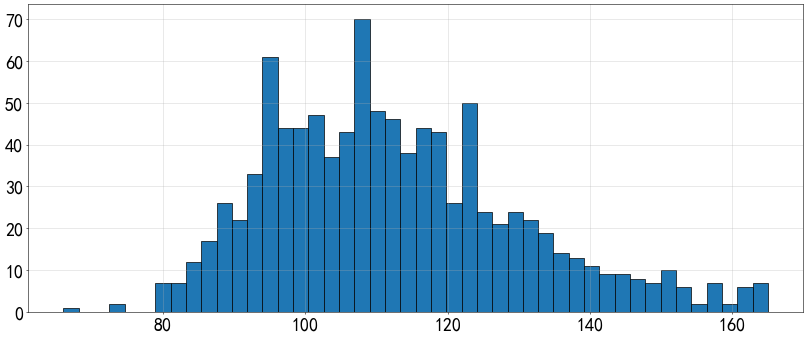

In [5]:
# 统计revenue 根据评分 绘制直方图
absolute =  df_movies['Revenue (Millions)'].max() - df_movies['Revenue (Millions)'].min()
group_num = (int)(absolute // 20)  # 组距，一组内20个数据

# 设置画布
figure = plt.figure(figsize=(20,8),  dpi=50)
plt.grid(alpha=0.5)
filtered_revenue = df_movies.loc[df_movies[df_movies.columns[7]] <= 165, df_movies.columns[7]]
plt.hist(filtered_revenue , bins=group_num, edgecolor='black')

### 获取电影题材

In [6]:
# 对 题材(Genre) 清洗，除掉 ,号
# 变成 list 列表 ， 便于后面去重set 或者 统计长度 len
# pandas 可以对一维(series) 去重 , 用unique
temp_list = df_movies["Genre"].str.split(",").tolist() 

# 对题材，展开，去重，再变成列表，统计所有题材类型
genre_list = list(set([i for j in temp_list for i in j]))

In [7]:
zero_df = pd.DataFrame(  np.zeros( (df_movies.shape[0],  len(genre_list))) ,  columns=genre_list   )

for i in range(zero_df.shape[0]):
    zero_df.loc[i,temp_list[i]] = 1
zero_df

,Sci-Fi,Mystery,Crime,Musical,Music,Comedy,Sport,Family,Horror,Fantasy,Adventure,Action,Romance,Biography,Western,Animation,Thriller,Drama,History,War
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<BarContainer object of 20 artists>

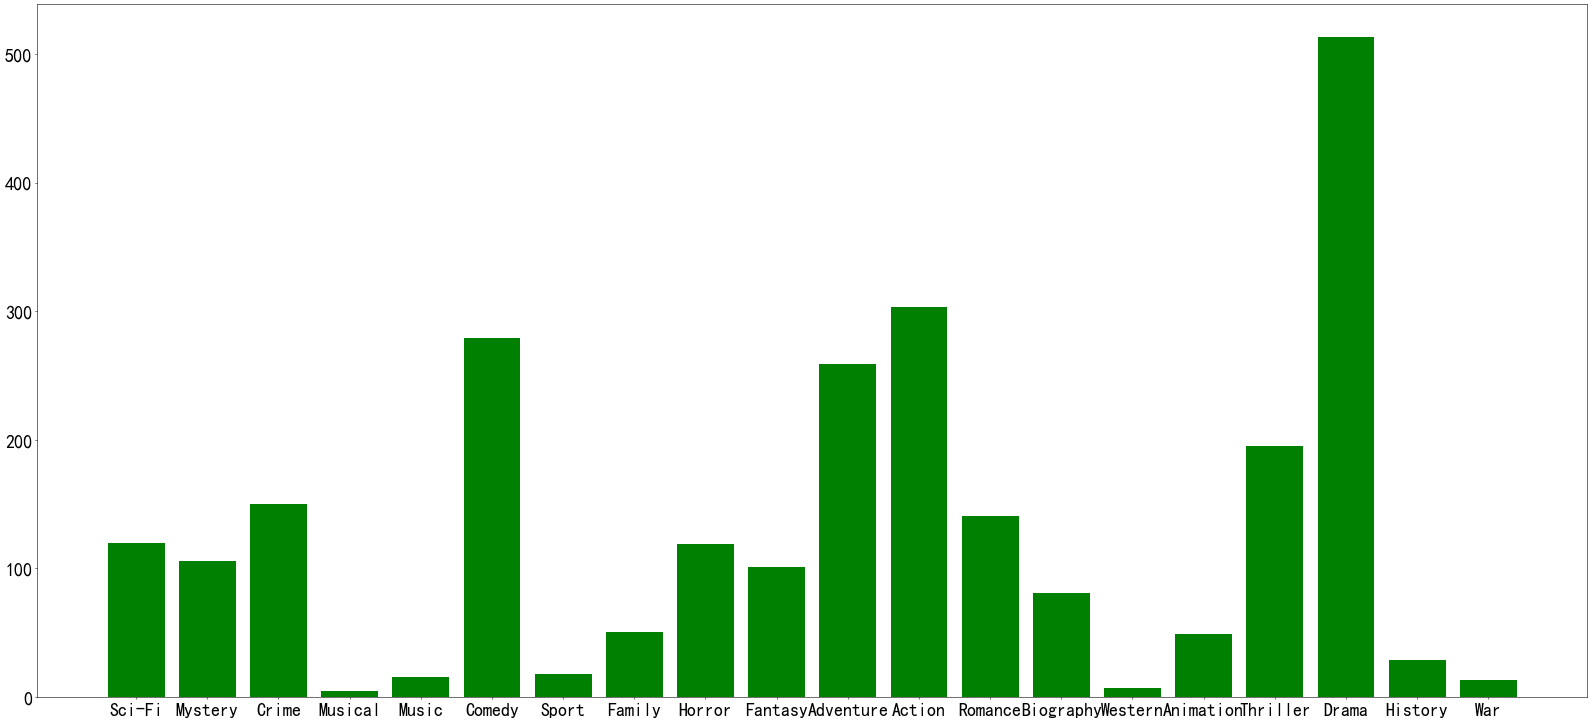

In [8]:
genre_count = zero_df.sum(axis=0)
plt.figure(figsize=(40,18),  dpi=50)
plt.bar(genre_list, genre_count, color='green')

<BarContainer object of 20 artists>

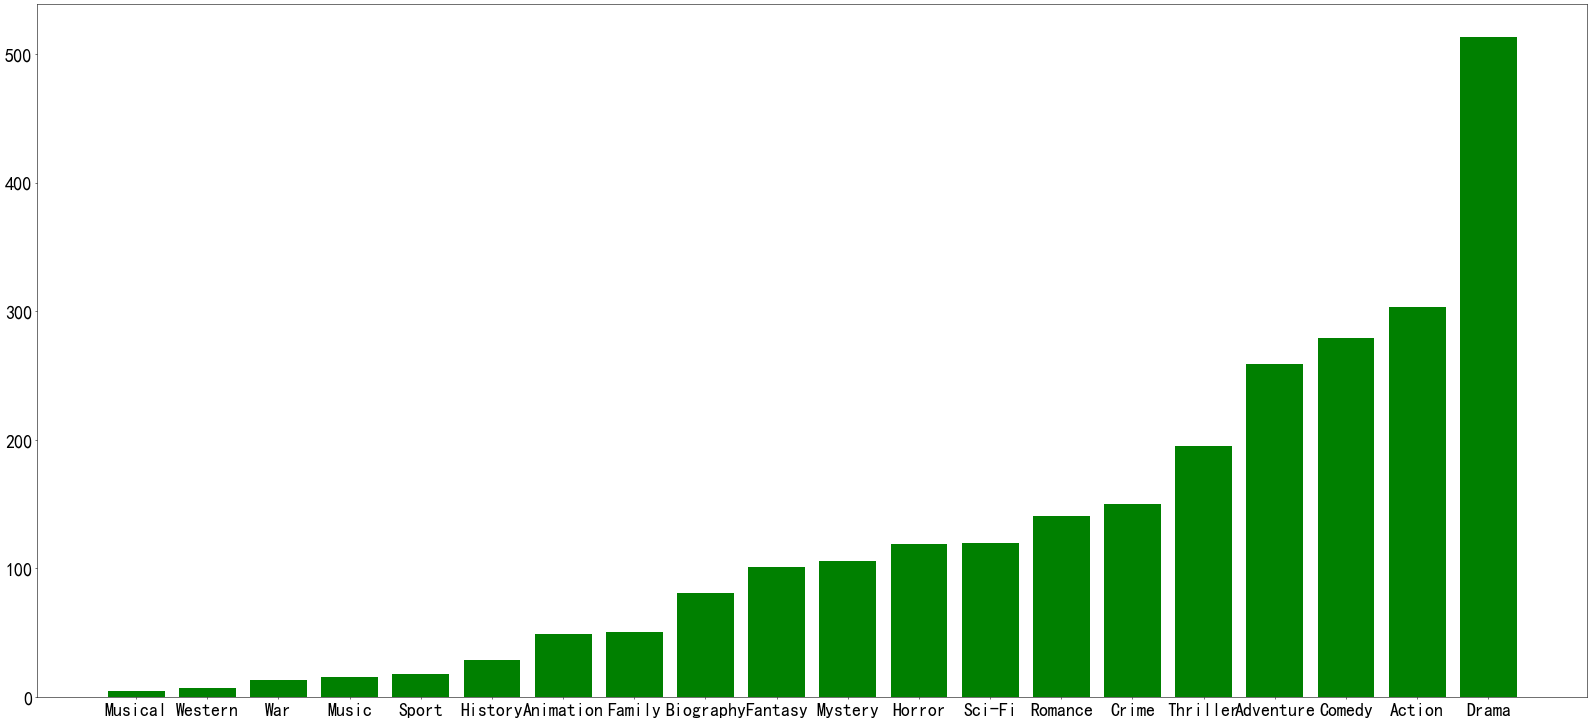

In [9]:
# 对出现次数排序
genre_sorted = genre_count.sort_values()
sorted_x = genre_sorted.index
sorted_y = genre_sorted.values
plt.figure(figsize=(40,18),  dpi=50)
plt.bar(sorted_x, sorted_y, color='green')